In [3]:
import numpy
import pandas as pd
from pandas import DataFrame, Series 

# Author: Joseph Ajulo (K00265910)


# ANALYSIS TASK 3

About the Dataset:
The dataset describes the status of each bike rental stand in the cities of Dublin. The city are indicated by the contractName column. The columns contractName and number uniquely identify each bike stand. The lastUpdate attribute specifies the time when the status of the bike rental station was last updated. Although the JCDecaux API server updates data at every point in time


OBJECTIVE:
Our objective here is to find answers to the following questions
1. At what period of the day are bikes from the Dublin stands being utilised the most.
2. Top address with more avaiable bikes all day long.
3. Most active and least active bike station?
4. bike stations and addresses with larger bike capacity

    IMPORTING ALL CSV FILES COLLECTED AT DIFFERENT TIME WITHIN 24RHS

In [5]:
Late_night_Data = pd.read_csv('df.csv')       #importing the late night bike dataset
Morning_Data = pd.read_csv('df_morning.csv')   #importing the morning bike dataset

In [9]:
Noon_data = pd.read_csv('df_Afternoon.csv')   #importing Afternoon bike dataset

In [425]:
Evening_data = pd.read_csv('df_Evening.csv')    #importing the Evening bike dataset

In [114]:
Late_night_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   number                 110 non-null    int64         
 1   contract_name          110 non-null    object        
 2   address                110 non-null    object        
 3   position               110 non-null    object        
 4   banking                110 non-null    bool          
 5   bonus                  110 non-null    bool          
 6   bike_stands            110 non-null    int64         
 7   available_bike_stands  110 non-null    int64         
 8   available_bikes        110 non-null    int64         
 9   status                 110 non-null    object        
 10  last_update            110 non-null    int64         
 11  last_update_time       110 non-null    datetime64[ns]
dtypes: bool(2), datetime64[ns](1), int64(5), object(4)
memory usage:

In [113]:
Morning_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   number                 110 non-null    int64         
 1   contract_name          110 non-null    object        
 2   address                110 non-null    object        
 3   position               110 non-null    object        
 4   banking                110 non-null    bool          
 5   bonus                  110 non-null    bool          
 6   bike_stands            110 non-null    int64         
 7   available_bike_stands  110 non-null    int64         
 8   available_bikes        110 non-null    int64         
 9   status                 110 non-null    object        
 10  last_update            110 non-null    int64         
 11  last_update_time       110 non-null    datetime64[ns]
dtypes: bool(2), datetime64[ns](1), int64(5), object(4)
memory usage:

In [112]:
Noon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   number                 110 non-null    int64         
 1   contract_name          110 non-null    object        
 2   address                110 non-null    object        
 3   position               110 non-null    object        
 4   banking                110 non-null    bool          
 5   bonus                  110 non-null    bool          
 6   bike_stands            110 non-null    int64         
 7   available_bike_stands  110 non-null    int64         
 8   available_bikes        110 non-null    int64         
 9   status                 110 non-null    object        
 10  last_update            110 non-null    int64         
 11  last_update_time       110 non-null    datetime64[ns]
dtypes: bool(2), datetime64[ns](1), int64(5), object(4)
memory usage:

In [270]:
Evening_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   number                 110 non-null    int64         
 1   contract_name          110 non-null    object        
 2   address                110 non-null    object        
 3   position               110 non-null    object        
 4   banking                110 non-null    bool          
 5   bonus                  110 non-null    bool          
 6   bike_stands            110 non-null    int64         
 7   available_bike_stands  110 non-null    int64         
 8   available_bikes        110 non-null    int64         
 9   status                 110 non-null    object        
 10  last_update            110 non-null    int64         
 11  last_update_time       110 non-null    datetime64[ns]
dtypes: bool(2), datetime64[ns](1), int64(5), object(4)
memory usage:

 Creating an new column called last_update_time for all dataFrames which indicate the time and date each 
    bike stand was updated 

In [423]:
Late_night_Data['last_update_time'] = Late_night_Data.iloc[:,11].apply(pd.Timestamp, unit = 'ms')
Late_night_Data.sort_values('last_update_time', ascending = False)[['last_update_time']].head()

#creating the new column for first dataframe

,last_update_time
24,2022-01-19 02:16:39
26,2022-01-19 02:16:24
106,2022-01-19 02:16:24
34,2022-01-19 02:15:53
92,2022-01-19 02:15:52


In [420]:
Morning_Data['last_update_time'] = Morning_Data.iloc[:,11].apply(pd.Timestamp, unit = 'ms')
Morning_Data.sort_values('last_update_time', ascending = False)[['last_update_time']].head()

,last_update_time
43,2022-01-19 09:47:11
33,2022-01-19 09:47:06
26,2022-01-19 09:47:03
84,2022-01-19 09:46:58
22,2022-01-19 09:46:53


In [416]:
Noon_data['last_update_time'] = Noon_data.iloc[:,11].apply(pd.Timestamp, unit = 'ms')
Noon_data.sort_values('last_update_time', ascending = False)[['last_update_time']].head()

,last_update_time
73,2022-01-19 12:42:13
19,2022-01-19 12:42:11
7,2022-01-19 12:42:08
5,2022-01-19 12:41:55
79,2022-01-19 12:41:52


In [418]:
Evening_data['last_update_time'] = Evening_data.iloc[:,11].apply(pd.Timestamp, unit = 'ms')
Evening_data.sort_values('last_update_time', ascending = False)[['last_update_time']].head()

,last_update_time
77,2022-01-19 18:12:14
21,2022-01-19 18:12:13
94,2022-01-19 18:12:13
45,2022-01-19 18:12:12
88,2022-01-19 18:12:09


In [424]:
Morning_Data.head(1)

,number,contract_name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update,last_update_time
0,42,dublin,Smithfield North,"{'lat': 53.349562, 'lng': -6.278198}",False,False,30,10,20,OPEN,1642585481000,2022-01-19 09:44:41


Taking a look at our Dataframes above we can observe two veriables (name , address) which have same data.
Hence we drop the name varaible

In [427]:
#Late_night_Data.drop(['name'], axis = 1, inplace = True) 

In [34]:
#Morning_Data.drop(['name'], axis = 1, inplace = True)

In [37]:
#Noon_data.drop(['name'], axis = 1, inplace = True)

In [38]:
#Evening_data.drop(['name'], axis = 1, inplace = True)

In [428]:
Late_night_Data.head(4)

,number,contract_name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update,last_update_time
0,42,dublin,Smithfield North,"{'lat': 53.349562, 'lng': -6.278198}",False,False,30,3,27,OPEN,1642558258000,2022-01-19 02:10:58
1,30,dublin,Parnell Square North,"{'lat': 53.353462, 'lng': -6.265305}",False,False,20,20,0,OPEN,1642558255000,2022-01-19 02:10:55
2,54,dublin,Clonmel Street,"{'lat': 53.336021, 'lng': -6.26298}",False,False,33,21,12,OPEN,1642558259000,2022-01-19 02:10:59
3,108,dublin,Avondale Road,"{'lat': 53.359405, 'lng': -6.276142}",False,False,35,21,14,OPEN,1642558258000,2022-01-19 02:10:58


---

We try to ensure there are no missing Data

In [25]:
Morning_Data.isnull() 

,number,contract_name,name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
105,False,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False,False,False
108,False,False,False,False,False,False,False,False,False,False,False,False


---

Since There are no missing Data ,we proceed to our analysis

Considring the first dataframe(late night bike data)


In [41]:
Late_night_Data.head()

,number,contract_name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update,last_update_time
0,42,dublin,Smithfield North,"{'lat': 53.349562, 'lng': -6.278198}",False,False,30,3,27,OPEN,1642558258000,2022-01-19 02:10:58
1,30,dublin,Parnell Square North,"{'lat': 53.353462, 'lng': -6.265305}",False,False,20,20,0,OPEN,1642558255000,2022-01-19 02:10:55
2,54,dublin,Clonmel Street,"{'lat': 53.336021, 'lng': -6.26298}",False,False,33,21,12,OPEN,1642558259000,2022-01-19 02:10:59
3,108,dublin,Avondale Road,"{'lat': 53.359405, 'lng': -6.276142}",False,False,35,21,14,OPEN,1642558258000,2022-01-19 02:10:58
4,56,dublin,Mount Street Lower,"{'lat': 53.33796, 'lng': -6.24153}",False,False,40,32,8,OPEN,1642558255000,2022-01-19 02:10:55


1. At time of the day are bikes more utilised ? 
  We can get the answer to this question by considring the Attribute 'available_bike_stands' and
  By Finding the Mean and standard deviation. the key indicator is the mean.

In [273]:

# calculating mean and standard deviation of total available bikes

Late_agg = Late_night_Data['available_bike_stands'].agg(["std", "mean"])
Late_agg

std     10.743332
mean    18.890909
Name: available_bike_stands, dtype: float64

In [276]:
Mrn_agg = Morning_Data['available_bike_stands'].agg(["std", "mean"])
Mrn_agg

std      8.924206
mean    19.572727
Name: available_bike_stands, dtype: float64

In [277]:
Noon_agg = Noon_data['available_bike_stands'].agg(["std", "mean"])
Noon_agg

std      8.569127
mean    19.681818
Name: available_bike_stands, dtype: float64

In [278]:
Evening_agg = Evening_data['available_bike_stands'].agg(["std", "mean"])
Evening_agg

std      9.003757
mean    19.845455
Name: available_bike_stands, dtype: float64

From the values above The Evening DataFrame has the higest mean value of 19.8454 and standard deviation of 9.0037
This clearly reveal more bikes was hired during that hour because it has the highest average value

In [303]:
import matplotlib.pyplot as plt

In [411]:

values = pd.DataFrame([Late_agg ,Mrn_agg,Noon_agg,Evening_agg]).reset_index()

#converting the mean and standard deviation values to aggregate to a single dataframe

In [327]:
value

,index,std,mean
0,available_bike_stands,10.743332,18.890909
1,available_bike_stands,8.924206,19.572727
2,available_bike_stands,8.569127,19.681818
3,available_bike_stands,9.003757,19.845455


In [412]:
Time_frame = pd.Series(['Late_night','Mornng','Noon','Evening'], name= 'Time') 

#converting the series to a single dataframe

In [388]:

Time_frame = Time_frame.to_frame()

In [392]:
All_aggregate = pd.concat([values,Time_frame], axis = 1)

In [401]:
All_aggregate = All_aggregate.set_index('Time').drop(['index'], axis = 1 )

In [402]:
All_aggregate

,std,mean
Time,,
Late_night,10.743332,18.890909
Mornng,8.924206,19.572727
Noon,8.569127,19.681818
Evening,9.003757,19.845455


Text(0.5, 0, 'Time of the day')

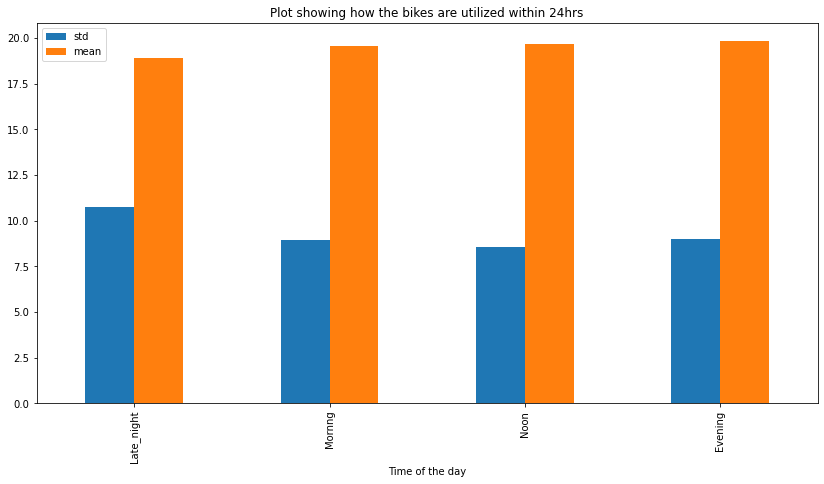

In [413]:
#Plotting a Bar with our dataframe

All_aggregate.plot(kind="bar",figsize=(14, 7))    

plt.title("Plot showing how the bikes are utilized within 24hrs")

plt.xlabel("Time of the day")


---

2. The most dominant bike address all through the day.
   We will ba making use of our Available bike here as our key indicator. The idea is to get top five address which have 
   higer number avaiable bikes in each dataframe

In [187]:
#Considering the late night dataframe first

Above_average_late = Late_night_Data[Late_night_Data['available_bikes'] > Late_night_Data['available_bikes'].agg('mean')]

#here we simly filter out the dataframe which the avaiable bikes is greater than the average avaiable bike.

In [198]:
Above_average_late1 = Above_average_late.loc[:, ['number','address', 'available_bikes']]\
.sort_values(['available_bikes'], ascending = False)

#Selecting the column needed and arranging it in Descending order

In [199]:
Above_average_late1.head()

,number,address,available_bikes
36,5,Charlemont Street,38
69,95,Royal Hospital,36
82,111,Mountjoy Square East,34
42,49,Guild Street,32
106,83,Emmet Road,31


the Above Dataframe shows the top five address at late night hour with more avaiable bikes

In [200]:
Above_average_Morning = Morning_Data[Morning_Data['available_bikes'] > Morning_Data['available_bikes'].agg('mean')]

Top5_address_morning = Above_average_Morning.loc[:, ['number','address', 'available_bikes']]\
.sort_values(['available_bikes'], ascending = False)



In [201]:
Top5_address_morning.head()

,number,address,available_bikes
69,95,Royal Hospital,34
25,114,Wilton Terrace (Park),33
64,69,Grand Canal Dock,28
107,92,Heuston Bridge (North),27
47,38,Talbot Street,26


he Above Dataframe shows the top five address in morning time hour with more avaiable bikes

In [203]:
Above_average_Noon = Noon_data[Noon_data['available_bikes'] > Noon_data['available_bikes'].agg('mean')]

Top5_address_noon = Above_average_Noon.loc[:, ['number','address', 'available_bikes']]\
.sort_values(['available_bikes'], ascending = False)


In [205]:
Top5_address_noon.head()

,number,address,available_bikes
64,69,Grand Canal Dock,27
47,38,Talbot Street,26
43,19,Herbert Place,26
98,80,St James Hospital (Luas),25
25,114,Wilton Terrace (Park),25


he Above Dataframe shows the top five address in Afternoon time hour with more avaiable bikes

In [370]:
Above_average_Evening = Evening_data[Evening_data['available_bikes'] > Evening_data['available_bikes'].agg('mean')]

Top5_address_Evening = Above_average_Evening.loc[:, ['number','address', 'available_bikes']]\
.sort_values(['available_bikes'], ascending = False)

In [208]:
Top5_address_Evening.head()

,number,address,available_bikes
47,38,Talbot Street,31
11,43,Portobello Road,29
42,49,Guild Street,28
78,34,Portobello Harbour,28
98,80,St James Hospital (Luas),25


he Above Dataframe shows the top five address in morning time hour with more avaiable bikes

Comparing all four DAtaframes Talbot Street	address have a signifcant occurence 


---

3. The most  active and least active bike station

In [429]:
#All four dataframes need to be join together here as one single table

In [430]:
Df = pd.concat([Late_night_Data, Morning_Data])  
Df1 = pd.concat([Noon_data, Evening_data])

In [224]:
All_Data = pd.concat([Df,Df1])
All_Data.head()

,number,contract_name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update,last_update_time
0,42,dublin,Smithfield North,"{'lat': 53.349562, 'lng': -6.278198}",False,False,30,3,27,OPEN,1642558258000,2022-01-19 02:10:58
1,30,dublin,Parnell Square North,"{'lat': 53.353462, 'lng': -6.265305}",False,False,20,20,0,OPEN,1642558255000,2022-01-19 02:10:55
2,54,dublin,Clonmel Street,"{'lat': 53.336021, 'lng': -6.26298}",False,False,33,21,12,OPEN,1642558259000,2022-01-19 02:10:59
3,108,dublin,Avondale Road,"{'lat': 53.359405, 'lng': -6.276142}",False,False,35,21,14,OPEN,1642558258000,2022-01-19 02:10:58
4,56,dublin,Mount Street Lower,"{'lat': 53.33796, 'lng': -6.24153}",False,False,40,32,8,OPEN,1642558255000,2022-01-19 02:10:55


In [351]:
 All_Data.rename({'number':'bike_station_ID'}, axis = 1 ,inplace = True)

In [352]:
Bike_stand_Df = All_Data.loc[:,['bike_station_ID','available_bike_stands']].sort_values\
('available_bike_stands', ascending = False)


In [353]:
Bike_stand_Df1 = Bike_stand_Df.groupby(["bike_station_ID"])["available_bike_stands"]\
                      .agg([("avaiable_bike_average", "mean")])

In [354]:
Bike_stand_Df1.sort_values('avaiable_bike_average' , ascending = False).head()

,avaiable_bike_average
bike_station_ID,
117,39.00
36,37.25
51,35.75
103,35.50
47,35.25


Clearly from the dataframe above ,The bike station number 117 has the highest avaiable bike stand average of 39. 


In [348]:
Bike_stand_Df1.sort_values('avaiable_bike_average' ).head()

,avaiable_bike_average
number,
3,5.75
33,6.25
10,6.25
24,8.00
4,8.00


And also from dataframe above ,The bike station number 3 has the lowest avaiable bike stand average of 5.75, hence low renting there .

---

 4 . Bike stations and addresses with the largest bike capacity :
 
      Here the marged dataframe is considered only here. Our key attribute is the 'bike_stands'

In [357]:
All_Data.head(2)

,bike_station_ID,contract_name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update,last_update_time
0,42,dublin,Smithfield North,"{'lat': 53.349562, 'lng': -6.278198}",False,False,30,3,27,OPEN,1642558258000,2022-01-19 02:10:58
1,30,dublin,Parnell Square North,"{'lat': 53.353462, 'lng': -6.265305}",False,False,20,20,0,OPEN,1642558255000,2022-01-19 02:10:55


In [373]:
Best_data = All_Data[All_Data['bike_stands']  ==  All_Data['bike_stands'].agg('max')]

#Filtering the dataframes with the highest bike stands

In [381]:
Best_data[['bike_station_ID','address','bike_stands']].head(10)   #selecting required columns

,bike_station_ID,address,bike_stands
4,56,Mount Street Lower,40
9,48,Excise Walk,40
13,98,Frederick Street South,40
15,106,Rathdown Road,40
17,68,Hanover Quay,40
21,90,Benson Street,40
25,114,Wilton Terrace (Park),40
28,113,Merrion Square South,40
32,67,The Point,40
35,62,Lime Street,40


Above are the bike station and addresses which have the higest capacity

---

CONCLUSION 
    
    From our analysis, there are more bike activity in Evening time.Talbot Street address is a very busy bike station and
    Bike station 117 and 3 are the most active and least active bike stations respectivly in the city of Dublin.
    
